In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
#This sets the formatting for the matplot figures

pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16


In [3]:
def rho_green_light(x, rho_light):
    """
    Computes the green light inital conditions With a shock linear distribution behind it
    
    paramerters
    -------------
    x : numpy.ndarray
        Location on the road as a 1D float array
    rho_light : float
        Car density at the light
        
    Returns
    --------------
    rho : numpy.ndarray
       The initial car density along the road as a 1D array 
    
    
    """
    
    
    rho = numpy.zeros_like(x)
    mask = numpy.where(x < 2.0)
    rho[mask] = rho_light * x[mask] / 2.0
    return rho

In [4]:
#setting up the parameters

nx = 81 #number or locations on the road
L = 4.0 #length of the road
dx = L / (nx -1) #distance between two locations
nt = 30 #the number of time steps
u_max = 1.0 #max speed limit on the road
rho_max = 10.0 #max car density
rho_light = 10.0 #max car density at light

#Discretize the road
x = numpy.linspace(0.0, L, num=nx)

#Compute the inital density
rho0 = rho_green_light(x, rho_light)


(-0.5, 11.0)

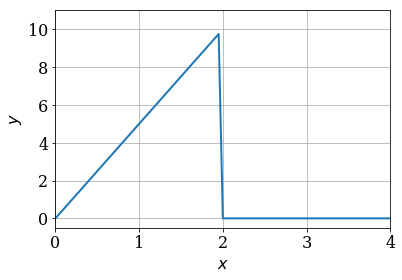

In [6]:
#this is plot of the inital density on the road
pyplot.figure(figsize = (6.0, 4.0))
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$y$')
pyplot.grid()
pyplot.plot(x, rho0, color='C0', linestyle='-', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(-0.5, 11.0)


In [7]:
def flux(rho, u_max, rho_max):
    """
    This calculates the traffic flux F =  * rho
    
    Parameters
    ------
    rho : numpy.ndarray
        Traffic density on the road as a 1D array of floats
    u_max : float
        Max speed allowed on the road
    rho_max : float
        Max car density possible on the road
        
    Returns
    -------
    F : numpy.ndarray
        The traffic flux along the road as a 1D array of floats
    
    """
    
    F = rho * u_max * (1.0 - rho / rho_max)
    return F

In [11]:
def ftbs(rho0, nt, dt, dx, bc_value, *args):
    """
    rho0 : numpy.ndarray
        the inital density along the road as 1D array of floats
    nt : int
        Number of time steps
    dt : float
        the time step size to integrate
    dx : float
        The distance between two locations
    bc_value : float
        The constant density at the first point
    args : list or tuple
        Positional arguments to be passed to the flux function
        
    Returns
    -----------
    rho_hist : list of numpy.ndarray objects
        The history of the car density along the road over time
    
    """
    
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        #calcs the flux
        F = flux(rho, *args)
        #advance along the time axis
        rho[1:] = rho[1:] - dt / dx * (F[1:] - F[:-1])
        #Set the left boundry conditions
        #rho[0] = bc_value 
        #record the current time step solution and append to the list
        rho_hist.append(rho.copy())
    return rho_hist

In [13]:
#set the time step size based on the CFL limit
sigma = 1.0
dt = sigma * dx / u_max #time_step size

# Compute the traffic density at all time steps
rho_hist = ftbs(rho0, nt, dt, dx, rho0[0], u_max, rho_max)

In [15]:
from matplotlib import animation
from IPython.display import HTML

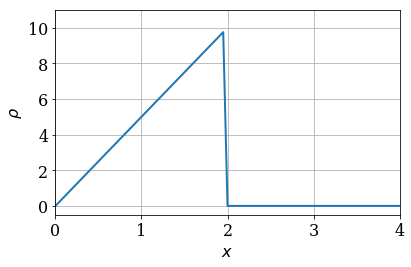

In [17]:
#plotting the inital traffic density
fig = pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho$')
pyplot.grid()
line = pyplot.plot(x, rho0,
                    color='C0', linestyle='-', linewidth=2)[0]
pyplot.xlim(0.0, L)
pyplot.ylim(-0.5, 11.0)
fig.tight_layout()

In [21]:
def update_plot(n, rho_hist):
    """
    this updates the line y-data of the matplot figure
    
    Parameters
    -----------
    n : integer
        The time-step index
    rho_hist : list of numpy.ndarray objects
        The history of the numerical solution
    
    
    """
    fig.suptitle('Time step {:0>2}'.format(n))
    line.set_ydata(rho_hist[n])

In [22]:
#creates the animation of the traffic density
anim = animation.FuncAnimation(fig, update_plot, frames=nt,
                              fargs=(rho_hist,), interval=100)

#displays the video
HTML(anim.to_html5_video())

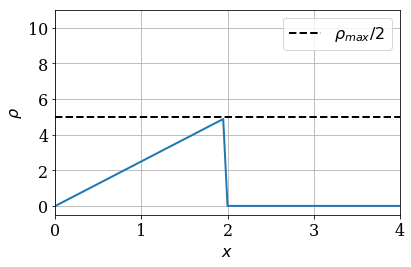

In [23]:
#modify some parameters
nt = 40 #number of time steps to compute
rho_light = 5.0 #car density at the stop light

#compute intial density
rho0 = rho_green_light(x, rho_light)

#plot the inital density
fig = pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho$')
pyplot.grid()
line = pyplot.plot(x, rho0,
                   color='C0', linestyle='-', linewidth=2)[0]
pyplot.hlines(rho_max / 2.0, 0.0, L,
              label=r'$\rho_{max} / 2$',
              color='black', linestyle='--', linewidth=2)
pyplot.legend()
pyplot.xlim(0.0, L)
pyplot.ylim(-0.5, 11.0)
fig.tight_layout()

In [24]:
#comput the trafic density at all time steps
rho_hist = ftbs(rho0, nt, dt, dx, rho0[0], u_max, rho_max)

In [25]:
#creat the animation of the traffic density
anim = animation.FuncAnimation(fig, update_plot,
                              frames=nt, fargs=(rho_hist,),
                              interval=100)

#displace the animation
HTML(anim.to_html5_video())

In [31]:
#set the parameters
rho_light = 4.0
u_max = 1.1

#compute the inital traffic density
rho0 = rho_green_light(x, rho_light)

#compute the traffic density at all time steps
rho_hist = ftbs(rho0, nt, dt, dx, rho0[0], u_max, rho_max)

# Creates an animation of the traffic density
anim = animation.FuncAnimation(fig, update_plot,
                              frames=nt, fargs=(rho_hist,),
                              interval=100)

#display the video
HTML(anim.to_html5_video())

In [36]:
from IPython.core.display import HTML
css_file = '../../styles/numericalmoocstyle.css'
HTML(open(css_file, 'r').read())

FileNotFoundError: [Errno 2] No such file or directory: '../../styles/numericalmoocstyle.css'